In [9]:
path = 'C:/Users/IFAM_CMZL/Downloads/VC/'

In [10]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.1
executing                 2.0.1
fastjsonschema            2.19.1
fonttools                 4.51.0
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.5
httpx                     0.27.0
idna           

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [12]:
dados = pd.read_csv(path + "ConsumoxCo2.csv")

In [13]:
dados.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTI

In [14]:
dados.head

<bound method NDFrame.head of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_C

In [15]:
dados.groupby('MAKE').count

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000249FF991E10>>

In [16]:
selecao = dados[["ENGINESIZE", "CO2EMISSIONS" ]]

In [17]:
selecao.head

<bound method NDFrame.head of       ENGINESIZE  CO2EMISSIONS
0            2.0           196
1            2.4           221
2            1.5           136
3            3.5           255
4            3.5           244
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[1067 rows x 2 columns]>

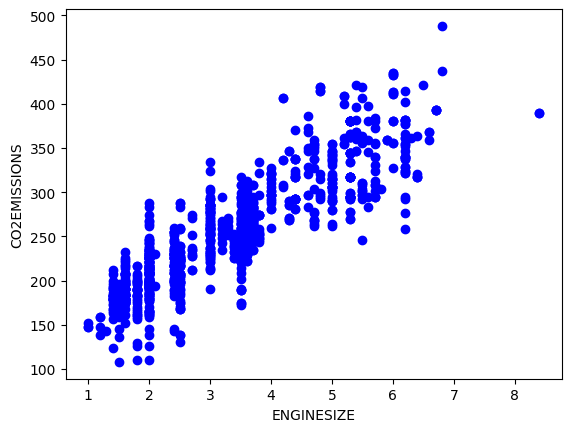

In [18]:
plt.scatter(selecao["ENGINESIZE"], selecao[ "CO2EMISSIONS"], color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

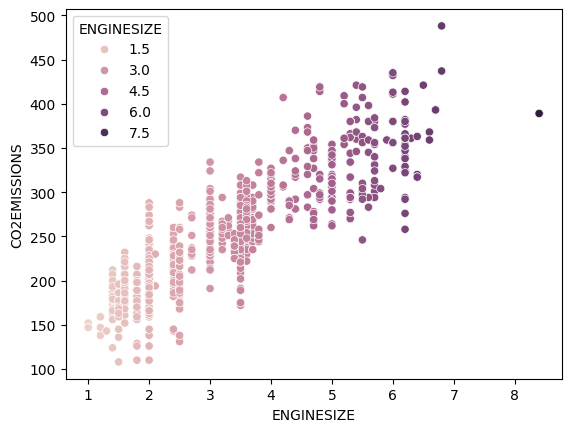

In [19]:
ax = sns.scatterplot(x="ENGINESIZE", y="CO2EMISSIONS", data=selecao, color= "blue", hue="ENGINESIZE" )

In [20]:
treino = selecao[:(int((len(selecao)*0.8)))]
teste =  selecao[(int((len(selecao)*0.8))):]

In [21]:
len(treino), len(teste)

(853, 214)

In [22]:
treino.shape, teste.shape

((853, 2), (214, 2))

In [23]:
modelo = linear_model.LinearRegression()

In [24]:
train_X = np.array(treino[["ENGINESIZE"]]) 
train_y = np.array(treino[["CO2EMISSIONS"]])

In [25]:
modelo.fit(train_X, train_y)

LinearRegression()

In [26]:
print('Intercept:', modelo.intercept_)

Intercept: [127.16989951]


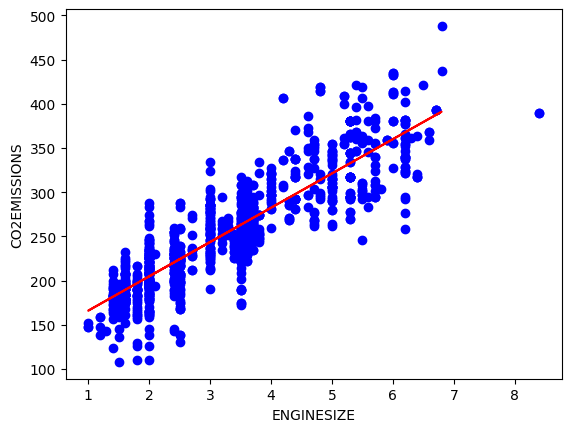

In [27]:
plt.scatter(selecao["ENGINESIZE"], selecao[ "CO2EMISSIONS"], color = "blue")
plt.plot(train_X, modelo.coef_ * train_X+ modelo.intercept_, '-r' )
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [28]:
def pred_modelo(features, intercept, slope):
    pred = features * slope + intercept
    return pred

In [29]:
potencia = 8.0
emissao_estimada = pred_modelo(potencia, modelo.intercept_[0], modelo.coef_[0][0])
print('Emissao de CO2 estimada para um engine', potencia, 'é: ', emissao_estimada)

Emissao de CO2 estimada para um engine 8.0 é:  437.530890197272


In [30]:
modelo.coef_?

Type:        ndarray
String form: [[38.79512384]]
Length:      1
File:        c:\users\ifam_cmzl\.conda\envs\visao_am\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optiona

In [31]:
sns.pairplot(df_iris, kind = 'scatter')
plt.show()

NameError: name 'df_iris' is not defined

In [32]:
import pandas as pd


In [34]:
df_mkt = pd.read_csv(path + 'dados_marketing.csv')

In [35]:
df_mkt

,Data,Semana,Semana_ID,Mes,Mes_ID,Ano,Nome_Dia,Visitantes,Vendas,Gastos_Mkt,Promo
0,09/11/2020,46,34,11,11,2020,Segunda,707,465,651.375000,Nenhuma
1,10/11/2020,46,34,11,11,2020,Terça,1455,10386,1298.250000,Promo Vermelha
2,11/11/2020,46,34,11,11,2020,Quarta,1520,12475,1559.375000,Promo Azul
3,12/11/2020,46,34,11,11,2020,Quinta,1726,11712,1801.750000,Nenhuma
4,13/11/2020,46,34,11,11,2020,Sexta,2134,10000,2614.500000,Nenhuma
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19,60,5,17,2021,Quarta,1400,7284,1119.600000,Nenhuma
178,06/05/2021,19,60,5,17,2021,Quinta,2244,13021,2067.888889,Promo Vermelha
179,07/05/2021,19,60,5,17,2021,Sexta,2023,4587,1450.200000,Nenhuma
180,08/05/2021,19,60,5,17,2021,Sábado,1483,5927,1121.875000,Nenhuma


In [36]:
df_mkt.describe()

,Semana,Semana_ID,Mes,Mes_ID,Ano,Visitantes,Vendas,Gastos_Mkt
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,21.785714,47.351648,5.269231,13.774725,2020.708791,1666.730769,10581.593407,1396.356564
std,18.369841,7.892053,4.204580,1.783540,0.455573,503.528049,6297.626426,691.867416
min,1.000000,34.000000,1.000000,11.000000,2020.000000,488.000000,292.000000,322.000000
25%,8.000000,40.000000,2.000000,12.000000,2020.000000,1339.000000,5929.500000,880.431250
50%,14.000000,48.000000,4.000000,14.000000,2021.000000,1546.000000,9452.000000,1223.900000
75%,47.000000,54.000000,11.000000,15.000000,2021.000000,2027.500000,12959.500000,1676.450000
max,53.000000,61.000000,12.000000,17.000000,2021.000000,4139.000000,36283.000000,4535.375000


In [40]:
df_mkt.groupby('Promo').sum('Gasto_MKt')

,Semana,Semana_ID,Mes,Mes_ID,Ano,Visitantes,Vendas,Gastos_Mkt
Promo,,,,,,,,
Nenhuma,1582,3503,384,1020,149533,120446,438415,87073.155555
Promo Azul,1177,2543,285,741,109118,96709,902101,98805.496969
Promo Vermelha,1206,2572,290,746,109118,86190,585334,68258.242173


In [56]:
df_mkt.groupby('Promo').sum('Gastos_Mkt').sort_values('Gastos_Mkt', ascending = True)

,Semana,Semana_ID,Mes,Mes_ID,Ano,Visitantes,Vendas,Gastos_Mkt
Promo,,,,,,,,
Promo Vermelha,1206,2572,290,746,109118,86190,585334,68258.242173
Nenhuma,1582,3503,384,1020,149533,120446,438415,87073.155555
Promo Azul,1177,2543,285,741,109118,96709,902101,98805.496969


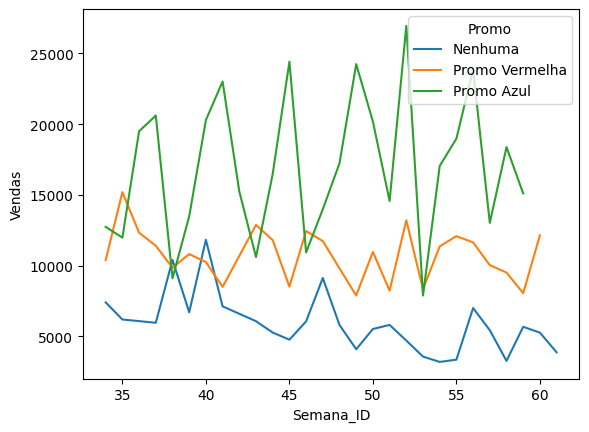

In [55]:
grafl = sns.lineplot(x = 'Semana_ID', y ='Vendas',  hue = 'Promo', data = df_mkt, errorbar = None)

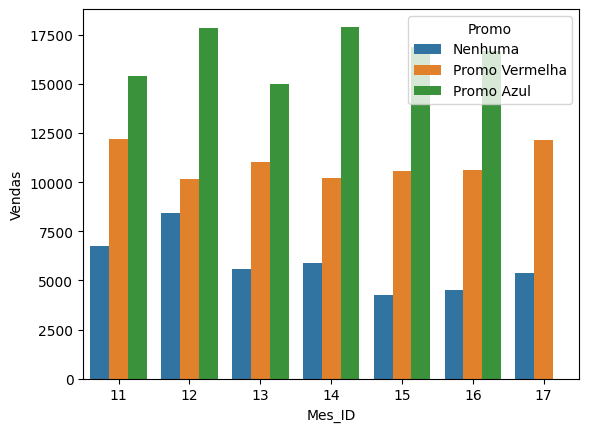

In [53]:
graf3 = sns.barplot(x = 'Mes_ID', y = 'Vendas', hue = 'Promo', data = df_mkt, errorbar = None)

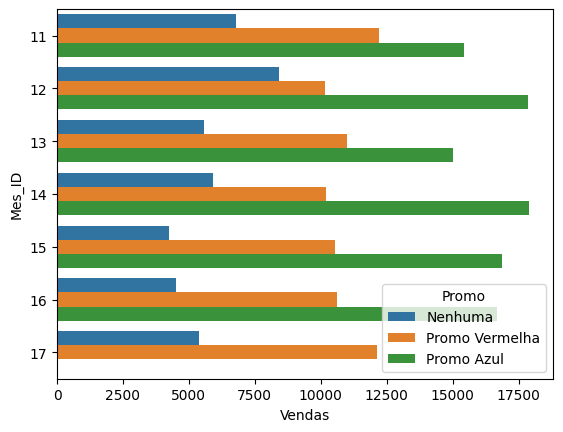

In [54]:
graf3 = sns.barplot(x = 'Vendas', y = 'Mes_ID', hue = 'Promo', orient = 'h', data = df_mkt, errorbar = None)

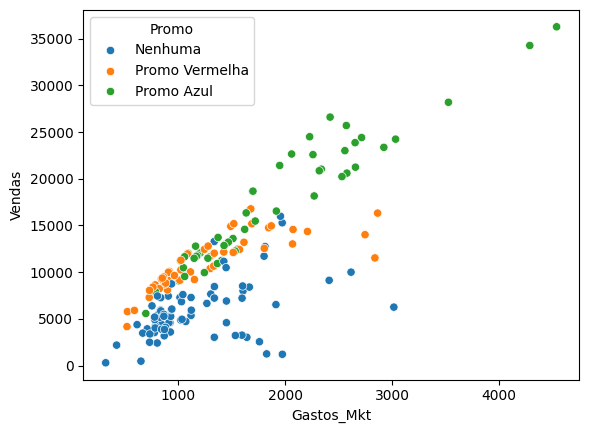

In [58]:
graf = sns.scatterplot(x = 'Gastos_Mkt', y = 'Vendas', hue = 'Promo', data = df_mkt)

In [63]:
cols = ['Vendas', 'Visitantes', 'Gastos_Mkt']

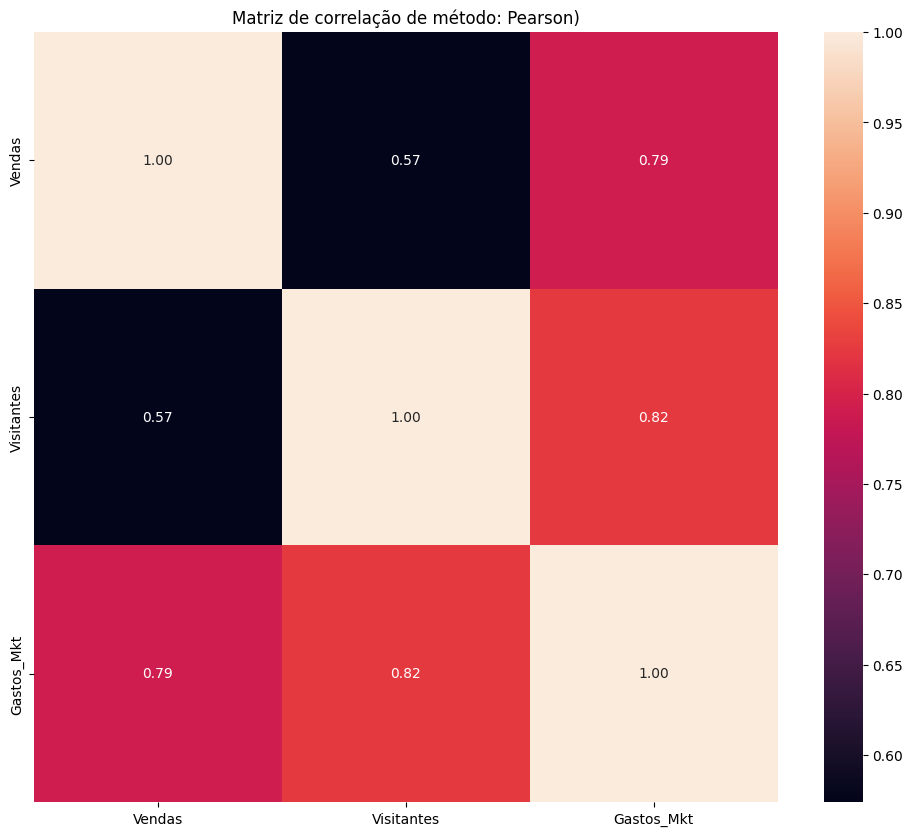

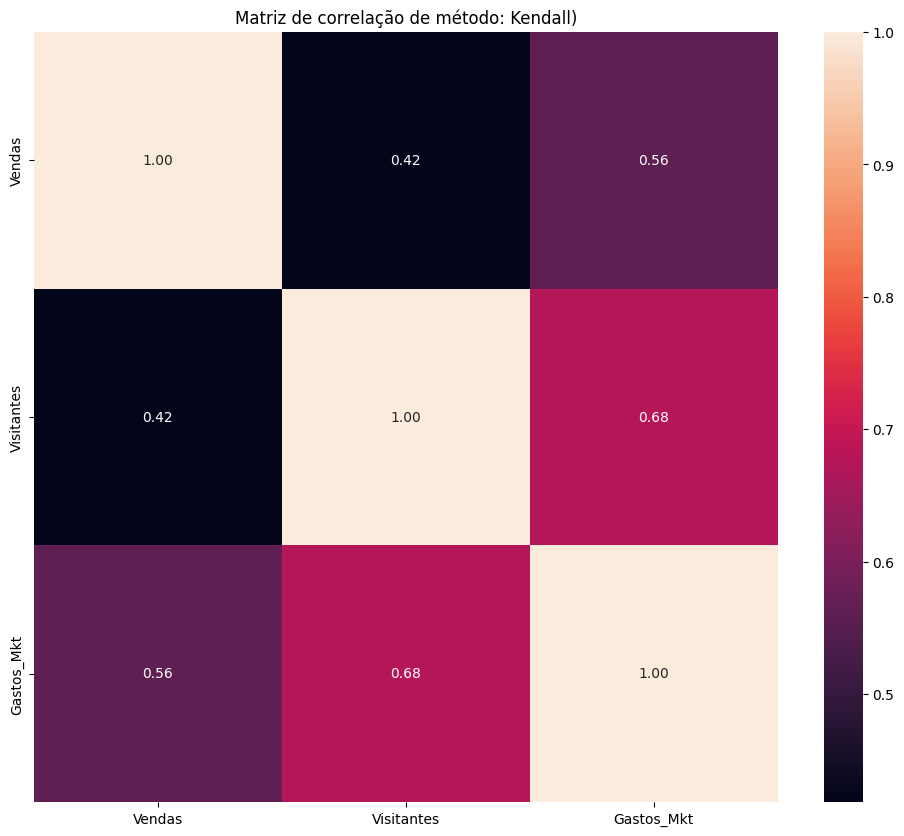

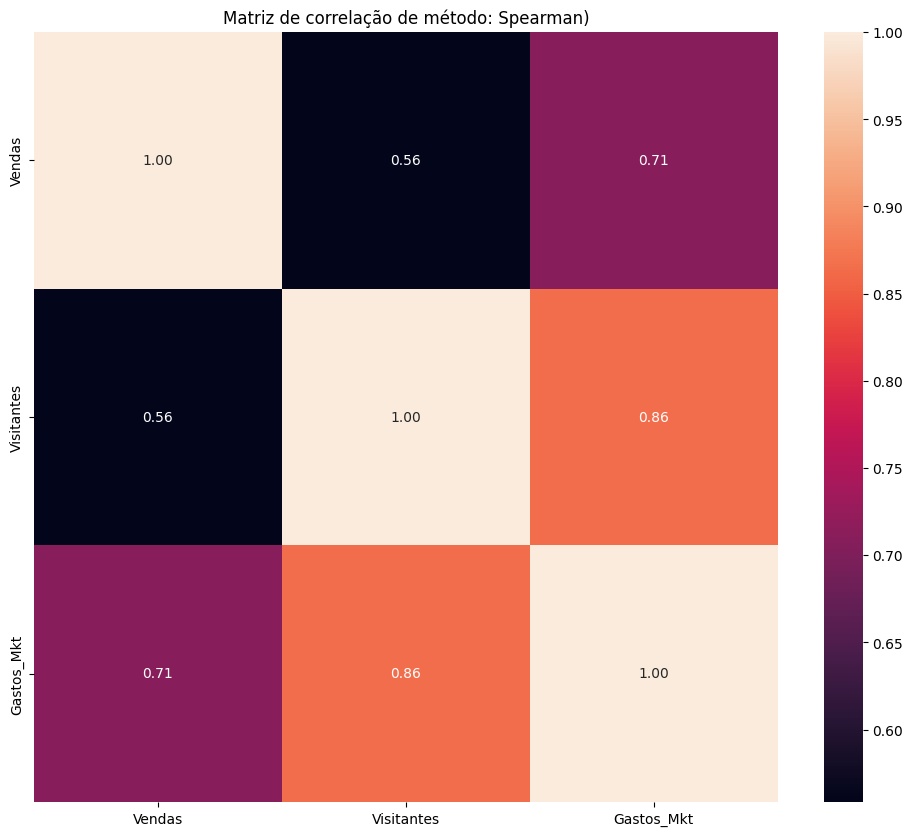

In [64]:
tipos_corr = ['pearson', 'kendall', 'spearman']
for tipo in tipos_corr:
    mc=df_mkt[cols].corr(method = tipo)
    plt.figure(figsize=(12,10))
    sns.heatmap(mc, annot = True, fmt = '.2f')
    plt.title(f'Matriz de correlação de método: {tipo.capitalize()})')
    plt.show()